### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import statsmodels.api as sm 
from sklearn import datasets 
import numpy as np  
from sklearn import linear_model 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


In [2]:
# Load the CSV file(s) as reviews.
t_reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
t_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [3]:
# Any missing values?
t_reviews.isnull()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# Descriptive statistics.
t_reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [5]:
# Drop unnecessary columns.
t_reviews = t_reviews.drop(['language','platform'], axis=1)

# View column names.
t_reviews.columns


Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [6]:
# Rename the column headers.
t_reviews.rename(columns = {'remuneration (k£)':'remuneration','spending_score (1-100)':'spending_score'}, inplace=True)
t_reviews.columns


Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [7]:
# Create a CSV file as output.
t_reviews.to_csv("t_reviews_v2.csv", index=False) #added index=false to prevent an index column in the csv fil

In [8]:
# Import new CSV file with Pandas.
t_reviews_v2 = pd.read_csv('t_reviews_v2.csv')

# View DataFrame.
t_reviews_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 5. Linear regression

### 5a) spending vs loyalty

In [9]:
# Dependent variable: loyalty_points is the dependent variable as this will be impacted by age/remuneration/spending.
# Independent variable: #age/remuneration/spending are the independent variable as they are explanatory/predictor and impact the loyalty points

# Dependent variable.
x = t_reviews_v2["spending_score"].values.reshape(-1,1)

# Independent variable.
y = t_reviews_v2["loyalty_points"]
#plot chart and regression line
#sns.lnplot(x='spending_score',y='loyalty_points',data=t_reviews_v2,fit_reg=True)

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = t_reviews_v2).fit()
test.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        16:18:06   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
t_reviews_v2 = linear_model.LinearRegression()

#fit the model
t_reviews_v2.fit(x, y)



LinearRegression()

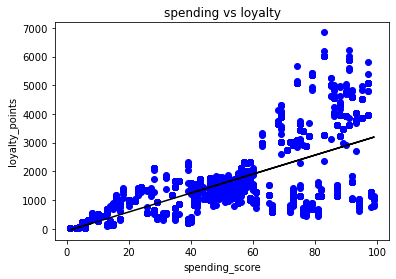

In [11]:
# Call the intercept.
t_reviews_v2.intercept_ 
# Estimated coefficients
t_reviews_v2.coef_ 
#create a scatterplot (with blue dat points)
plt.scatter(x, y, color='blue')

#create a regression line in green
plt.plot(x, t_reviews_v2.predict(x), color = 'black')

#set the title and labels for the graph
plt.title("spending vs loyalty")
plt.xlabel("spending_score")
plt.ylabel("loyalty_points")

#print the graph
plt.show()

In [12]:
t_reviews_v2 = line.LinearRegression()

#fit the model
t_reviews_v2.fit(x, y)

NameError: name 'line' is not defined

### 5b) renumeration vs loyalty

In [ ]:
# Dependent variable.
x = t_reviews_v2["remuneration"].values.reshape(-1,1)

# Independent variable.
y = t_reviews_v2["loyalty_points"]

#plt.scatter(X2,y1)
#plot chart and regression line
#sns.lmplot(X2="remuneration",y1="loyalty_points",data=t_reviews_v2,fit_reg=True)

# OLS model and summary.
#f = 'y1 ~ X2'
#test = ols(f, data = t_reviews_v2).fit()
#test.summary()
f = 'y ~ x'
test = ols(f, data = t_reviews_v2).fit()
test.summary()

In [ ]:
t_reviews_v2 = linear_model.LinearRegression()

#fit the model
t_reviews_v2.fit(x, y)

In [ ]:
# Extract the estimated parameters.


# Extract the standard errors.


# Extract the predicted values.


In [ ]:
# Set the the X coefficient and the constant to generate the regression table.


# View the output.


In [ ]:
# Plot graph with regression line.


### 5c) age vs loyalty

In [ ]:
# Independent variable.


# Dependent variable.


# OLS model and summary.


In [ ]:
# Extract the estimated parameters.


# Extract the standard errors.


# Extract the predicted values.


In [ ]:
# Set the X coefficient and the constant to generate the regression table.


# View the output.


In [ ]:
# Plot graph with regression line.


## 6. Observations and insights

***Your observations here...***






# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [ ]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('t_reviews_v2.csv')

# View DataFrame.
df2.info()

In [ ]:
# Drop unnecessary columns.
df2 = df2.drop(['gender','age','loyalty_points','education','product','review','summary'],axis=1)
                
# View column names.
df2.columns

In [ ]:
# View head
df2.head()

In [ ]:
# Explore the data
df2.info()


In [ ]:
#descriptive statistics
df2.describe()

## 2. Plot

In [ ]:
# Create a scatterplot with Seaborn.
sns.scatterplot(data=df2, x='remuneration',
               y='spending_score')

In [ ]:
# Create a pairplot with Seaborn.
x = df2[['remuneration','spending_score']]

sns.pairplot(df2, vars=x)

## 3. Elbow and silhoutte methods

In [ ]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 2000, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 10), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

In [ ]:
#Determine the 
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()


## 4. Evaluate k-means model at different values of *k*

In [ ]:
#both the elbow method and silhouette model show 5 clusters. From initial 
#review of the pairplot and scatterplot data, this seems to be the most 
#fitting for the dataset as 5 clusters look present from chart visusalisation
# Using 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 2000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [ ]:
#test clusters either side of 5 to see how that looks
# Using 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 2000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [ ]:
#test clusters either side of 5 to see how that looks
# Using 6 clusters:
kmeans = KMeans(n_clusters = 6, max_iter = 2000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

## 5. Fit final model and justify your choice

In [ ]:
# final model will use 5 clusters. 
kmeans = KMeans(n_clusters = 5, max_iter = 2000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [ ]:
# Apply the final model.
# View the K-Means predicted.
print(x.head())

In [ ]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

## 6. Plot and interpret the clusters

In [ ]:
# Visualise the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])



In [ ]:
#view the data frame 
x

## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [ ]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
#!pip install TextBlob 
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews.csv')

# View DataFrame.
df3.head()

In [ ]:
# Explore data set.
df3.info()

In [ ]:
# Keep necessary columns. Drop unnecessary columns.
df3_subset = df3[['review','summary']]
# View DataFrame.
df3_subset.head()

In [ ]:
# Determine if there are any missing values.
df3_subset.isnull().sum()

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [ ]:
# Review: Change all to lower case and join with a space.
df3_subset['review']=df3_subset['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df3_subset['review'].head()

In [ ]:
# Summary: Change all to lower case and join with a space.
df3_subset['summary']=df3_subset['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df3_subset['summary'].head()

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [ ]:
# Replace all the punctuations in review column.
df3_subset['review'] = df3_subset['review'].str.replace('[^\w\s]','')

# View output.
df3_subset['review'].head()

In [ ]:
# Replace all the puncuations in summary column.
df3_subset['summary'] = df3_subset['summary'].str.replace('[^\w\s]','')

# View output.
df3_subset['summary'].head()

### 2c) Drop duplicates in both columns

In [ ]:
# Drop duplicates in both columns.
df4 = df3_subset.drop_duplicates(subset=['review','summary'])

df4.reset_index(inplace=True)
df4.head()

## 3. Tokenise and create wordclouds

In [ ]:
# Create new DataFrame (copy DataFrame).
df5 = pd.DataFrame(df4)

# View DataFrame.
df5.dtypes

In [ ]:
# Apply tokenisation to both columns.
df6 = df5['review']=df5['review'].apply(word_tokenize)  
df6.shape

In [ ]:
df7 = pd.DataFrame(df6)
df7.reset_index(inplace=True)
df7.head()

In [ ]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_comments = []
for i in range(df7.shape[0]):
    # Add each comment.
    all_comments = all_comments + df7['review'][i]

In [ ]:
textt = " ".join(comment for comment in all_comments)

In [ ]:
# Review: Create a word cloud.
#!pip install WordCloud
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns


In [ ]:
wordcloud = WordCloud(width = 1600, height = 900,
background_color ='white',
colormap ='plasma',
stopwords = 'none',
min_font_size = 10).generate(textt)

In [ ]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [ ]:
# Summary: Plot the WordCloud image.


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [ ]:
# Determine the frequency distribution.


### 4b) Remove alphanumeric characters and stopwords

In [ ]:
# Delete all the alpanum.


In [ ]:
# Remove all the stopwords


### 4c) Create wordcloud without stopwords

In [ ]:
# Create a wordcloud without stop words.


In [ ]:
# Plot the wordcloud image.


### 4d) Identify 15 most common words and polarity

In [ ]:
# Determine the 15 most common words.


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine polarity of both columns. 


# View output.


In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.


# View output.


In [ ]:
# Top 20 negative summaries.


# View output.


In [ ]:
# Top 20 positive reviews.


# View output.


In [ ]:
# Top 20 positive summaries.


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

# 